Important Packages

In [1]:
import nltk
# nltk.download('punkt') # required for tokenization
# nltk.download('stopwords') # required for Stopword Removal
# nltk.download('wordnet')  # required for Lematization

In [2]:
import os
cwd = os.getcwd()
cwd

'D:\\EDUCATION\\EDU\\SEM 6\\NLP'

Getting Training Data

In [3]:
Dir = cwd+"\\DATA\\"

def READ(K):
    C = []
    os.chdir(Dir)
    for files in os.walk("./"+K):
        for filename in files:
            C.append(filename)
    C = C[2]
    Corpus = []
    for i in C:
        file = "./"+K+"//"+i
        print(file)
        f = open(file,'r',encoding="utf8")
        T = f.read()
        Corpus.append(T)
    os.chdir(cwd)
    return Corpus
POS = READ("+");
print("-------------------------------")
NEG = READ("-");

./+//httpsen.wikipedia.orgwikiKumbh_Mela.txt
./+//httpsindianexpress.comarticleexplainedkumbh-mela-2021-mythology-preparations-coronavirus-haridwar-6719596.txt
./+//httpswww.britannica.comtopicKumbh-Mela.txt
./+//httpswww.fortuneindia.compolemicistwhy-the-kumbh-mela-is-an-economic-blessing102900.txt
./+//httpswww.tourmyindia.comkumbhmela.txt
-------------------------------
./-//httpsthewire.ingovernmentkumbh-2021-astrology-mortality-and-the-indifference-to-life-of-leaders-and-stars.txt
./-//httpstimesofindia.indiatimes.comcitydehradunnearly-1300-test-covid-positive-at-kumbh-in-3-days-14-lakh-take-part-in-3rd-shahi-snanarticleshowprint82074940.cms.txt
./-//httpswww.bbc.comnewsworld-asia-india-56770460.txt
./-//httpswww.freepressjournal.invirala-sea-of-followers-at-kumbh-mela-twitteratis-feud-over-corona-politics-continues.txt
./-//httpswww.sciencedirect.comsciencearticlepiiS1198743X14001074.txt


In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

Pre Processing 

In [5]:
def PREPRO(Corpus):
    # 1. Normalization
    lower_corpus = []
    Normalized_corpus = []

    for i in range(len(Corpus)):
        lower_corpus.append(' '.join([word.lower() for word in Corpus[i].split()]))
        
    for i in range(len(lower_corpus)):
        Normalized_corpus.append(' '.join([word for word in lower_corpus[i].split() if word.isalpha()]))
        
    # 2. Tokenization
    tokenized_corpus = []
    for i in range(len(Normalized_corpus)):
        tokenized_corpus.append(word_tokenize(Normalized_corpus[i]))
        
    # 3. Stopword removal
    stop=stopwords.words(fileids='english')
    StopR_corpus = []

    for i in range(len(tokenized_corpus)):
        StopR_corpus.append([word for word in tokenized_corpus[i] if word not in stop])
        
    # 4. Stemming
    ps=PorterStemmer()
    Stemmed_corpus=[]
    for i in range(len(StopR_corpus)):
        Stemmed_corpus.append([ps.stem(word) for word in StopR_corpus[i]])
        
    # 5.Lematization
    #Lemit =[]
    #lemmatizer = WordNetLemmatizer()
    #for i in range(len(Stemmed_corpus)):
    #    Lemit.append([lemmatizer.lemmatize(word) for word in Stemmed_corpus[i]])
    
        
    Corpus = []
    for i in Stemmed_corpus:
        Str =""
        for ele in i: 
            Str += ele+" "
        Corpus.append(Str)
        
    return Corpus


POS = PREPRO(POS) 
NEG = PREPRO(NEG)


Forming DataSet

In [6]:
import pandas as pd
DATA1 = pd.DataFrame(columns=["Flag","Article"])
DATA2 = pd.DataFrame(columns=["Flag","Article"])
for i in POS:
    df2 = {"Flag" : 1,"Article":i}
    DATA1 = DATA1.append(df2,ignore_index = True)
for i in NEG:
    df2 = {"Flag" : 0,"Article":i}
    DATA2 = DATA2.append(df2,ignore_index = True)
    

DATA1["Flag"] = DATA1["Flag"].astype('int')
DATA2["Flag"] = DATA2["Flag"].astype('int')
DATA1 = DATA1.sample(frac=1).reset_index(drop=True)
DATA2 = DATA2.sample(frac=1).reset_index(drop=True)

Spliting Data

In [7]:
Train = DATA1[0:3]
Train = Train.append(DATA2[0:3])
Test = DATA1[3:5]
Test = Test.append(DATA2[3:5])
Train = Train.sample(frac=1).reset_index(drop=True)
Test = Test.sample(frac=1).reset_index(drop=True)

Extracting Features

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
traindataset = cv.fit_transform(Train["Article"])
N = cv.get_feature_names()
X = traindataset
BOW = pd.DataFrame(X.toarray(),columns=N)
print(BOW.shape)
BOW 

(6, 2367)


,aarogya,aarogya setu,accid,accid terrorist,accord,accord chief,accord hindu,accord sinc,accord state,accord vikram,...,year recent,year senior,yearn,yearn explor,yellow,yellow invas,zealou,zealou devote,zodiac,zodiac jupit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,6,2,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
5,1,1,0,0,1,0,0,0,0,1,...,0,1,1,1,0,0,1,1,0,0


Making A random Forest Model and Testing Data

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [10]:
Mscore = 0
BK = 0 
SK = []
SS = []
for K in range (100,1000,50):
    Trandomclassifier=RandomForestClassifier(n_estimators=K,criterion='entropy')
    Trandomclassifier.fit(traindataset,Train["Flag"])
    test_dataset = cv.transform(Test["Article"])
    Tpredictions = Trandomclassifier.predict(test_dataset)
    score = accuracy_score(Test["Flag"],Tpredictions)
    SK.append(K)
    SS.append(score)
    if(Mscore < score):
        BK = K
        score = Mscore
        predictions = Tpredictions
        randomclassifier = Trandomclassifier

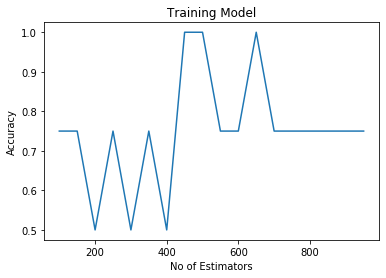

No of Estimators taken :  950


In [11]:
import matplotlib.pyplot as plt 
plt.plot(SK,SS)
plt.title('Training Model')
plt.xlabel('No of Estimators')
plt.ylabel('Accuracy')
plt.show()
print('No of Estimators taken : ',BK)

RESULTS

In [12]:
matrix=confusion_matrix(Test["Flag"],predictions)
print(matrix)
print("________________________________")
score=accuracy_score(Test["Flag"],predictions)
print("Accuracy_score : ",score)
print("________________________________")
report=classification_report(Test["Flag"],predictions)
print(report)

[[2 0]
 [1 1]]
________________________________
Accuracy_score :  0.75
________________________________
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



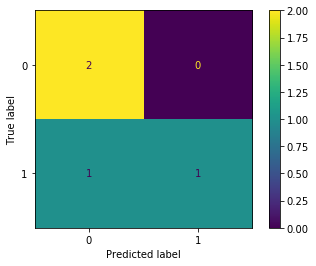

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomclassifier, test_dataset, Test["Flag"])  
plt.show() 

APPLICATION ON TWEET ANALYSIS

In [14]:
from pywebcopy import save_webpage
import time
import threading

url = 'https://twitter.com/search?q=kumbh%20mela&src=typed_query'
download_folder = cwd    
kwargs = {'bypass_robots': True, 'project_name': 'Tweet Analysis'}

def DOWN():
    save_webpage(url, download_folder, **kwargs)


t = threading.Thread(target=DOWN)
t.daemon = True
t.start()

time.sleep(20)

pywebcopy.configs - INFO     - Got response 200 from https://twitter.com/robots.txt
C:\Users\Public\anaconda3\lib\site-packages\pywebcopy\webpage.py:84: UserWarning: Global Configuration is not setup. You can ignore this if you are going manual.This is just one time warning regarding some unexpected behavior.
  "Global Configuration is not setup. You can ignore this if you are going manual."
pywebcopy.configs - INFO     - Got response 200 from https://twitter.com/search?q=kumbh%20mela&src=typed_query
webpage    - INFO     - Starting save_complete Action on url: ['https://twitter.com/search?q=kumbh%20mela&src=typed_query']
parsers    - INFO     - Parsing tree with source: <<urllib3.response.HTTPResponse object at 0x000001ECD4D8AEC8>> encoding <utf-8> and parser <<lxml.etree.HTMLParser object at 0x000001ECD4D64408>>
webpage    - INFO     - Starting save_assets Action on url: 'https://twitter.com/search?q=kumbh mela&src=typed_query'
webpage    - Level 100 - Queueing download of <269> asse

In [15]:
file = cwd+'\\Tweet Analysis\\twitter.com'
C = []
for files in os.walk(file):
    for filename in files:
        C.append(filename)
C = C[2][0]
C

'4845791a__search.html'

In [16]:
from bs4 import BeautifulSoup
os.chdir(file)
response =  open(C)
Data = response.read()
response.close()
os.chdir(cwd)
soup = BeautifulSoup(Data, 'html.parser')

In [17]:
tweets = soup.find_all("p",{"class": "TweetTextSize js-tweet-text tweet-text","lang": "en"})
Tweet = []
for T in tweets:
    Tweet.append(T.text)
print("Total Fetched Tweets in English : ",len(Tweet))

Total Fetched Tweets in English :  20


In [18]:
print(Tweet[4])

"26th May tak Hum Kumbh Mela Dhoom dhaam se manayege aur yahi rakhenge" - Mahant Narayan Giri of Juna Akhara
This would've been breaking news across news channels if this was announced in Nizamuddin Markaz by Head of Tablighi Jamaat head, Maulana Saad. 

pic.twitter.com/BfsEDKobfy


In [19]:
ATweet = Tweet

In [20]:
Tweet = PREPRO(Tweet)

In [21]:
Tweet = pd.DataFrame(Tweet,columns=["Tweets"])
ATweet = pd.DataFrame(ATweet,columns=["Tweets"])

In [22]:
test_dataset = cv.transform(Tweet["Tweets"])
predictions = randomclassifier.predict(test_dataset)
ATweet["Predictions"] = pd.DataFrame(predictions)
ATweet

,Tweets,Predictions
0,I have a problem with the Kumbh Mela. But i ha...,0
1,Question: Did you know that the super-spreader...,0
2,report of Rajesh Kunte- kumbh attendee\nTHE T...,0
3,There were no trains for 40 days last year whe...,0
4,"""26th May tak Hum Kumbh Mela Dhoom dhaam se ma...",0
5,"MORNING: ""Kumbh Mela must be kept symbolic due...",0
6,Here’s BJP’s @amitmalviya admitting that Modi ...,0
7,Listen to what Arnab Goswami said about Kumbh ...,0
8,PM tweet 17/4:\nI appeal to everyone to keep K...,0
9,#ResignModi Pragya mishra murdered in broad da...,0


In [23]:
for index, row in ATweet.iterrows():
    print(row['Tweets'])
    print("_________________________________")
    print("Sentiments => ",end="  ")
    if row['Predictions'] == 0 :
        print("Negative")
    else:
        print("Positive")
    print("_________________________________")
    print("---------------------------------------------------------")

I have a problem with the Kumbh Mela. But i have no problem with this. I'm an Indian secular. 
That's the tweet. pic.twitter.com/bknSjiPraZ
_________________________________
Sentiments =>   Negative
_________________________________
---------------------------------------------------------
Question: Did you know that the super-spreader Kumbh Mela in Haridwar should have happened next year – twelve years after the last one, in 2010?

But the government agreed to bring it forward to 2021, for astrological reasons?

RT if you didn't know, Fav if you did.
_________________________________
Sentiments =>   Negative
_________________________________
---------------------------------------------------------
report  of Rajesh Kunte- kumbh attendee
THE TRUTH ABOUT HARIDWAR DURING KUMBHA*

I think people really need to know the truth of what happened in Haridwar during Kumbh Mela and the arrangements there.

I have returned from Haridwar today (17 April, 2021).
_________________________________
S

In [24]:
C = list(ATweet.isin([0]).sum())
C = C[1]
N = ATweet.shape[0]
X1 = ((N-C)/N)*100 
X0 = ((C)/N)*100
print("Tweet Analysis On Topic - Kumbh Mela in Covid")
print("Positive : ",X1 ,"%")
print("Negative : ",X0 ,"%")

Tweet Analysis On Topic - Kumbh Mela in Covid
Positive :  0.0 %
Negative :  100.0 %
